<a href="https://colab.research.google.com/github/DEBMALYASEN/ABC/blob/master/yahoostock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#THIS PREDICTS PRICE OF FB STOCK FOR A PARTICULAR DAY


In [130]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [54]:
from google.colab import files
uploaded=files.upload()

Saving FB.csv to FB (1).csv


In [101]:
df=pd.read_csv('yahoo.csv')

In [102]:
df.shape

(1262, 7)

In [103]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-08,533.309998,534.119995,526.239990,526.830017,526.830017,1520600
1,2015-06-09,527.559998,529.200012,523.010010,526.690002,526.690002,1455300
2,2015-06-10,529.359985,538.359985,529.349976,536.690002,536.690002,1815000
3,2015-06-11,538.424988,538.979980,533.020020,534.609985,534.609985,1217500
4,2015-06-12,531.599976,533.119995,530.159973,532.330017,532.330017,955800


In [104]:
df.shape

(1262, 7)

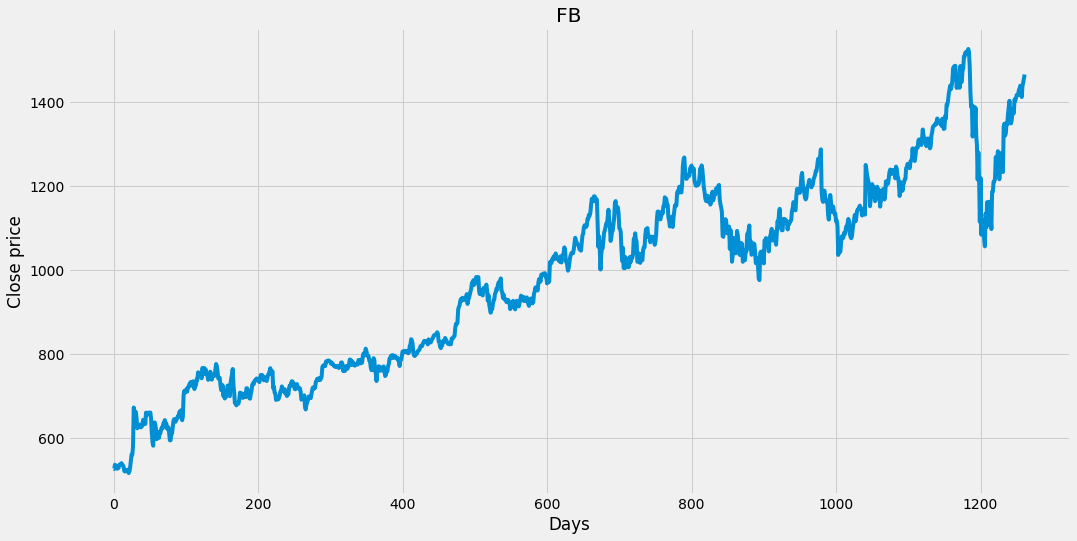

In [105]:
plt.figure(figsize=(16,8))
plt.title('FB')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.plot(df['Close'])
plt.show()

In [106]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [107]:

df.drop(['High','Low'],axis=1,inplace=True)

In [108]:
df.drop(['Open','Volume','Adj Close'],axis=1,inplace=True)

In [110]:
df.drop(['Date'],axis=1,inplace=True)

In [111]:
df.tail(10)

,Close
1252,1416.729980
1253,1428.920044
1254,1431.819946
1255,1439.219971
1256,1436.380005
1257,1412.180054
1258,1438.390015
1259,1446.609985
1260,1456.160034
1261,1465.849976


In [112]:
df.dtypes

Close    float64
dtype: object

In [151]:
#Create a variable to predict x day out in future
future_days=75
df['Prediction']=df['Close'].shift(-future_days)
df.head()

,Close,Prediction
0,526.830017,622.359985
1,526.690002,625.799988
2,536.690002,611.969971
3,534.609985,594.890015
4,532.330017,594.969971


In [152]:
#Create the feature data set(x) and convert it to a numpy array and remove last x rows/days
X=np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[ 526.830017]
 [ 526.690002]
 [ 536.690002]
 ...
 [1518.150024]
 [1485.109985]
 [1421.589966]]


In [153]:
#Create the target data set(y) and convert it to a numpy array and remove last x rows/days
Y=np.array(df['Prediction'])[:-future_days]
print(Y)

[ 622.359985  625.799988  611.969971 ... 1446.609985 1456.160034
 1465.849976]


In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,
                                                    )

In [155]:
X_train.shape

(830, 1)

In [156]:
X_test.shape

(357, 1)

In [157]:

y_train.shape

(830,)

In [158]:
y_test.shape

(357,)

In [159]:
tree= DecisionTreeRegressor(random_state = 0) 
tree.fit(X_train,y_train) 
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [160]:
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future


array([[1292.030029],
       [1291.800049],
       [1308.859985],
       [1311.369995],
       [1299.189941],
       [1298.800049],
       [1298.      ],
       [1311.459961],
       [1334.869995],
       [1320.699951],
       [1315.459961],
       [1303.050049],
       [1301.349976],
       [1295.339966],
       [1306.689941],
       [1313.550049],
       [1312.98999 ],
       [1304.959961],
       [1289.920044],
       [1295.280029],
       [1320.540039],
       [1328.130005],
       [1340.619995],
       [1343.560059],
       [1344.660034],
       [1345.02002 ],
       [1350.27002 ],
       [1347.829956],
       [1361.170044],
       [1355.119995],
       [1352.619995],
       [1356.040039],
       [1349.589966],
       [1348.839966],
       [1343.560059],
       [1360.400024],
       [1351.890015],
       [1336.140015],
       [1337.02002 ],
       [1367.369995],
       [1360.660034],
       [1394.209961],
       [1393.339966],
       [1404.319946],
       [1419.829956],
       [14

In [161]:
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction=lr.predict(x_future)
print(lr_prediction)

[1393.180054 1393.180054 1318.089966 1319.040039 1341.390015 1341.390015
 1341.390015 1319.040039 1298.410034 1215.560059 1280.390015 1215.410034
 1114.910034 1219.72998  1084.329956 1096.800049 1096.800049 1115.290039
 1072.319946 1219.72998  1134.459961 1102.48999  1161.75     1110.709961
 1146.819946 1162.810059 1211.449951 1120.839966 1263.209961 1186.920044
 1186.51001  1186.920044 1211.449951 1211.449951 1110.709961 1263.209961
 1263.469971 1283.25     1266.609985 1263.209961 1263.209961 1276.310059
 1279.310059 1275.880005 1465.849976 1341.47998  1348.660034 1320.609985
 1348.660034 1351.109985 1347.300049 1372.560059 1406.719971 1403.26001
 1375.73999  1349.329956 1356.130005 1356.130005 1356.130005 1373.484985
 1406.719971 1402.800049 1402.800049 1417.02002  1417.839966 1416.72998
 1428.920044 1431.819946 1439.219971 1436.380005 1436.380005 1436.380005
 1446.609985 1456.160034 1465.849976]

[1292.65597962 1292.45550439 1307.32677386 1309.51476771 1298.89732664
 1298.55745496 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


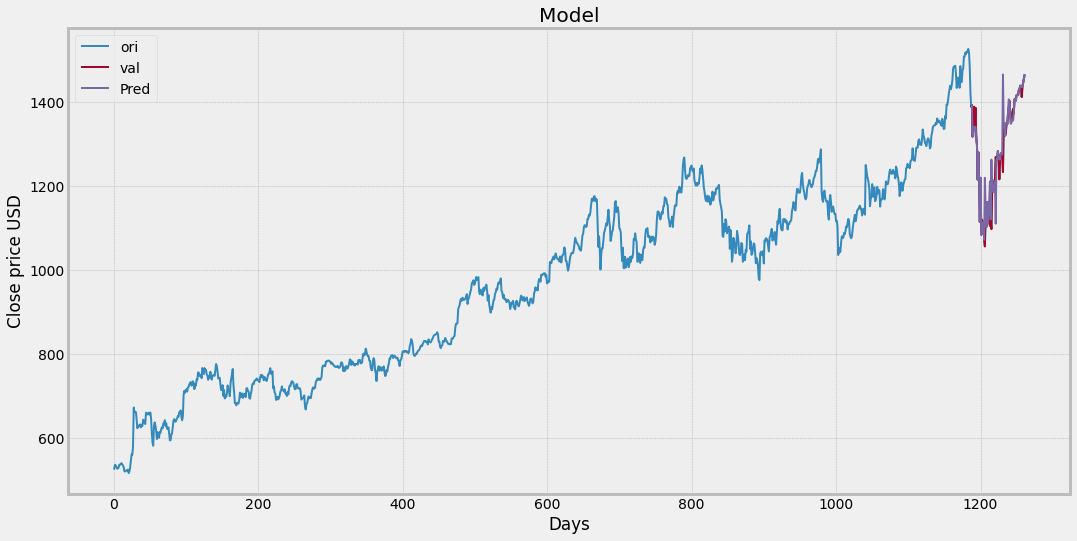

In [162]:

predictions=tree_prediction
valid=df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['ori','val','Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


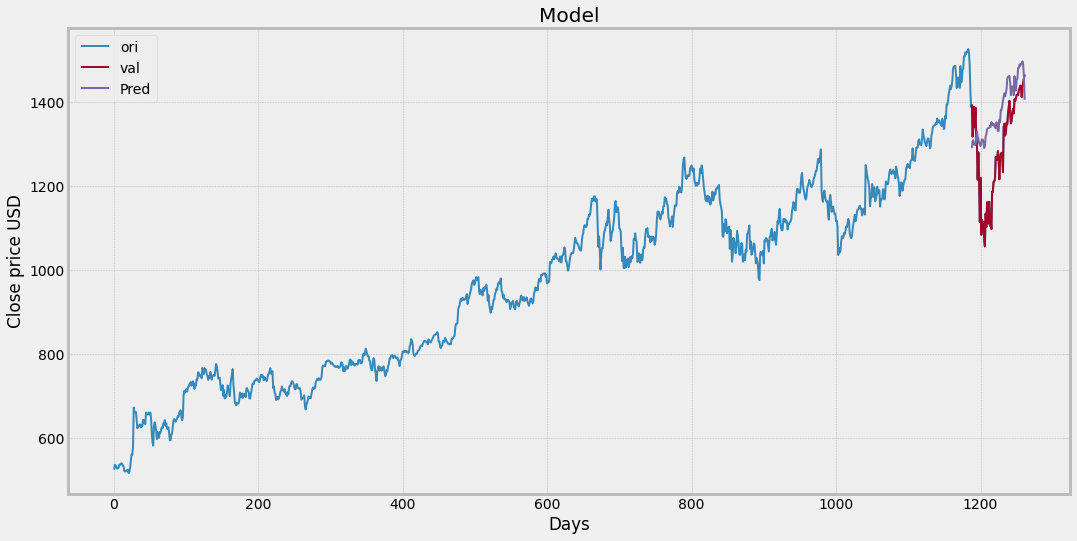

In [163]:
predictions=lr_prediction
valid=df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['ori','val','Pred'])
plt.show()